Tests with Big Buck Bunny, 1920x1080 @ 30fps

Download from http://bbb3d.renderfarming.net/download.html (263 MB)

In [64]:
big_buck_bunny = 'C:\\data\\bbb_sunflower_1080p_30fps_normal.mp4'

def frame2sum(frame):
    return frame.sum()


In [65]:
from vid2sound import video2array_async

%time samples = video2array_async(big_buck_bunny, frame2sum)

Number of frames: 19036
Wall time: 4min 1s
Stopping, no more frames


In [63]:
import matplotlib.pyplot as plt
from scipy.stats import describe
from vid2sound import normalize

print(describe(samples))

# remove offset:
samples = samples - samples.mean()

# normalize to fit in [-1, 1]
samples_normalized = normalize(samples)

plt.plot(samples_normalized)
plt.show()

ImportError: cannot import name 'normalize'

In [18]:
from scipy.io import wavfile
from vid2sound import normalize_int32

wavfile.write('test.wav', 44100, samples_normalized)
wavfile.write('test_int.wav', 44100, normalize_int32(samples))

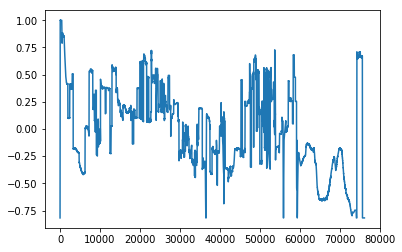

In [29]:
import numpy as np

t = np.linspace(0, len(samples), len(samples))
t_stretched = np.linspace(0, len(samples), 4 * len(samples))

samples_stretched = np.interp(t_stretched, t, samples)

plt.plot(samples_stretched)
plt.show()

wavfile.write('test_stretched.wav', 44100, samples_stretched)

Number of frames: 14315
Wall time: 35.6 sStopping, no more frames

DescribeResult(nobs=14315, minmax=(0.0, 269775229.0), mean=134028170.00845267, variance=3353421451810442.5, skewness=-0.029246581816594786, kurtosis=-0.7137415353942154)


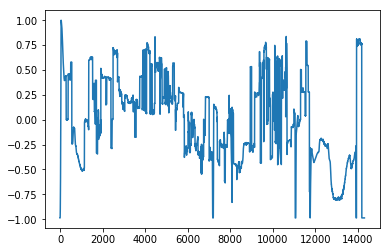

In [32]:
from vid2sound import video2array_async

big_buck_bunny_small = 'C:\\data\\big_buck_bunny_480p_surround-fix.avi'
%time samples_small = video2array_async(big_buck_bunny_small, frame2sum)

print(describe(samples_small))

def normalize(samples):
    # remove offset:
    samples = samples - samples.mean()

    # normalize to fit in [-1, 1]
    return samples / max(abs(samples.min()), samples.max())

samples_small = normalize(samples_small)

plt.plot(samples_small)
plt.show()

In [50]:
from math import log2, round

def print_size_and_magnitude(a, b):
    print(a, '*', b, '\t', a * b, '\t', a * b * 2**16, '\t', round(log2(a * b * 2**16)), '\t', round(log2(a*b)))
    
print_size_and_magnitude(854, 480)
print_size_and_magnitude(1280, 720)
print_size_and_magnitude(1920, 1080)
print_size_and_magnitude(1, 2**32 - 1)


ImportError: cannot import name 'round'

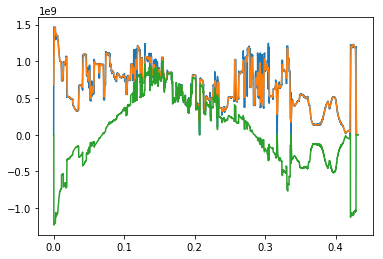

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [145]:

import matplotlib.pyplot as plt

def smooth(ys, window_size):
    window = np.ones(window_size)/window_size
    return np.convolve(ys, window, mode='same')

enveloped = samples * np.sin(2 * np.linspace(0, 3.14, len(samples)) -1)
enveloped[:10] = 0

t = np.arange(len(samples)) / framerate

plt.plot(t, samples)
plt.plot(t, smooth(samples, 77))
plt.plot(t, enveloped)
plt.show()

from IPython.display import Audio, display, HTML
framerate = 44100
#Audio(samples, rate=framerate)
display(Audio(samples, rate=framerate))
display(Audio(smooth(samples, 77), rate=framerate))
display(Audio(enveloped, rate=framerate))
enveloped[:10]

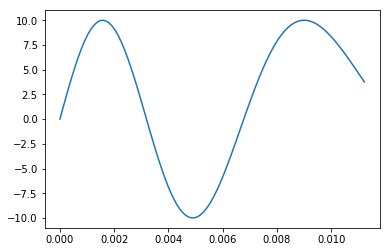

In [132]:
sample_rate = 44100
t = np.linspace(0, 10, 2*sample_rate)
# t = np.linspace(0, 5 * sample_rate, sample_rate)

def fm(A, omega_c, beta, omega_m, t):
    return A * np.sin(omega_c * t + beta * np.sin(omega_m * t))

sound = fm(10, 10, 9.9, 100.1, t)
plt.plot(t[:100], sound[:100])
plt.show()

display(Audio(sound, rate=sample_rate))

NameError: name 'plot' is not defined